# Dimensional Resemblance Analysis (DRA) Dataset F

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from dimensional_resemblance import preprocess_data
from dimensional_resemblance import pca_transform
from dimensional_resemblance import isomap_transform
from dimensional_resemblance import umap_transform
from dimensional_resemblance import dra_distance

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/F_IndianLiverPatient_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/F_IndianLiverPatient_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/F_IndianLiverPatient_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/F_IndianLiverPatient_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/F_IndianLiverPatient_Synthetic_WGANGP.csv'}
categorical_columns = ['gender','class']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':      age  gender   TB   DB  alkphos  sgpt   sgot   TP  ALB   A_G class
 0     68  Female  0.6  0.1   1620.0  95.0  127.0  4.6  2.1  0.80   1.0
 1     31    Male  1.3  0.5    184.0  29.0   32.0  6.8  3.4  1.00   1.0
 2     28    Male  0.8  0.3    190.0  20.0   14.0  4.1  2.4  1.40   1.0
 3     60    Male  2.3  0.6    272.0  79.0   51.0  6.6  3.5  1.10   1.0
 4     48  Female  0.9  0.2    173.0  26.0   27.0  6.2  3.1  1.00   1.0
 ..   ...     ...  ...  ...      ...   ...    ...  ...  ...   ...   ...
 461   75  Female  0.8  0.2    188.0  20.0   29.0  4.4  1.8  0.60   1.0
 462   36    Male  5.3  2.3    145.0  32.0   92.0  5.1  2.6  1.00   2.0
 463   37    Male  0.7  0.2    235.0  96.0   54.0  9.5  4.9  1.00   1.0
 464   17  Female  0.5  0.1    206.0  28.0   21.0  7.1  4.5  1.70   2.0
 465   17    Male  0.9  0.2    224.0  36.0   45.0  6.9  4.2  1.55   1.0
 
 [466 rows x 11 columns],
 'GM':      age  gender        TB        DB     alkphos        sgpt        sgot  \
 0     68    Male

## 2. Preprocess variables for data reduction

In [5]:
data_scaled = dict()
for name in tqdm(DATA_TYPES) :
    data_scaled[name] = preprocess_data(data[name])
    print(name, ':', data_scaled[name].shape)
data_scaled

100%|██████████| 5/5 [00:00<00:00, 61.27it/s]

Real : (466, 13)
GM : (466, 13)
SDV : (466, 13)
CTGAN : (466, 13)
WGANGP : (466, 12)


{'Real': array([[ 1.52159826, -0.42952576, -0.49523195, ...,  0.        ,
          1.        ,  0.        ],
        [-0.84514935, -0.31892322, -0.35090544, ...,  1.        ,
          1.        ,  0.        ],
        [-1.0370478 , -0.39792504, -0.4230687 , ...,  1.        ,
          1.        ,  0.        ],
        ...,
        [-0.46135244, -0.4137254 , -0.45915032, ...,  1.        ,
          1.        ,  0.        ],
        [-1.74067547, -0.44532613, -0.49523195, ...,  0.        ,
          0.        ,  1.        ],
        [-1.74067547, -0.38212467, -0.45915032, ...,  1.        ,
          1.        ,  0.        ]]),
 'GM': array([[ 1.4817512 , -0.12272322, -0.26416609, ...,  1.        ,
          1.        ,  0.        ],
        [ 1.11263356, -0.10194752, -0.24318221, ...,  0.        ,
          1.        ,  0.        ],
        [ 1.35871199, -0.10016286, -0.25999185, ...,  1.        ,
          1.        ,  0.        ],
        ...,
        [-1.28663108, -0.08662816, -0.24

## 3. Principal Component Analysis (PCA)

In [6]:
pca = dict()
pca['Real'] = pca_transform(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
for name in SYNTHESIZERS :
    pca[name] = pca_transform(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
pca

{'Real':           PC1       PC2  Label
 0    1.744895 -2.573888    0.0
 1   -0.800061  0.353419    0.0
 2    0.084727 -1.746468    0.0
 3   -0.295001 -0.175885    0.0
 4   -0.631879 -0.526813    0.0
 ..        ...       ...    ...
 461  0.531683 -2.950626    0.0
 462  0.413648 -0.974610    0.0
 463 -1.892420  2.787985    0.0
 464 -1.904358  1.528364    0.0
 465 -1.303788  1.249411    0.0
 
 [466 rows x 3 columns],
 'GM':           PC1       PC2  Label
 0    0.996531 -1.441250    1.0
 1   -0.015428  0.084636    1.0
 2    0.674665  1.262220    1.0
 3   -2.123788  2.051842    1.0
 4   -0.948401  0.152430    1.0
 ..        ...       ...    ...
 461 -0.364699 -0.479160    1.0
 462 -0.425200 -0.375175    1.0
 463 -0.763003  0.814098    1.0
 464  0.869925 -1.696410    1.0
 465  0.470317 -1.107519    1.0
 
 [466 rows x 3 columns],
 'SDV':           PC1       PC2  Label
 0    1.241510 -0.752331    1.0
 1   -1.372167  0.586874    1.0
 2    0.423216  1.338296    1.0
 3    0.401635 -0.165809    1

GM
- Joint distance:  0.1048
#############################################
SDV
- Joint distance:  0.0297
#############################################
CTGAN
- Joint distance:  0.3405
#############################################
WGANGP
- Joint distance:  0.4625
#############################################


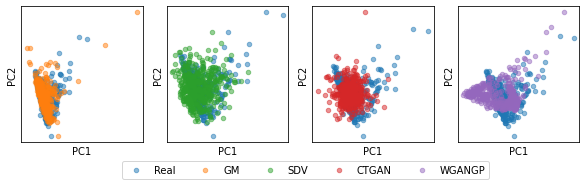

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5))
axs_idxs = range(4)
idx = dict(zip(SYNTHESIZERS,axs_idxs))
targets = [0,1]
COLORS = [['tab:blue','tab:orange'], ['tab:blue','tab:green'], ['tab:blue','tab:red'], ['tab:blue','tab:purple']]
cont = 0
first = True 
legend_data = list()
pca_real = pca['Real'][['PC1','PC2']]
for name in SYNTHESIZERS :
    
    pca_data = pd.DataFrame(data=pca['Real'], columns=['PC1','PC2','Label']).append(pca[name]).sample(frac=1)
    ax = axs[idx[name]]
    colors = COLORS[cont]
    
    for target, color in zip(targets,colors):
        indicesToKeep = pca_data['Label'] == target
        handles = ax.scatter(pca_data.loc[indicesToKeep, 'PC1'], pca_data.loc[indicesToKeep, 'PC2'], c = color, s = 20, alpha = 0.5)
        
        if target == 1 or first == True :
            legend_data.append(handles)
            first = False
            
        pca_synthetic = pca[name][['PC1','PC2']]
    
    print(name)
    joint_dist = dra_distance(pca_real, pca_synthetic)
    print('- Joint distance: ', joint_dist)
    print('#############################################')
             
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_xticks([])
    ax.set_yticks([])
    cont=cont+1

ax.legend(handles=legend_data, ncol=5, labels=DATA_TYPES, bbox_to_anchor=(0.3,-0.1))
fig.savefig('DATA REDUCTION RESULTS/PCA_PLOTS.png', bbox_inches='tight')

## 4. ISOMAP

In [8]:
isomap = dict()
isomap['Real'] = isomap_transform(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
for name in SYNTHESIZERS :
    isomap[name] = isomap_transform(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
isomap

{'Real':           PC1       PC2  Label
 0    4.869201 -1.620321    0.0
 1    1.885660  0.977275    0.0
 2    0.080498 -2.386263    0.0
 3    2.994352  0.102897    0.0
 4   -1.005601  0.804002    0.0
 ..        ...       ...    ...
 461 -0.380304 -2.590542    0.0
 462 -5.201979 -2.573559    0.0
 463  0.158248  3.628444    0.0
 464 -6.070645  2.930066    0.0
 465  1.378922  1.766932    0.0
 
 [466 rows x 3 columns],
 'GM':           PC1       PC2  Label
 0    2.690069  1.339918    1.0
 1   -0.618161 -0.217128    1.0
 2    1.688680  0.309364    1.0
 3   -2.936117 -2.409600    1.0
 4   -5.311039  0.987205    1.0
 ..        ...       ...    ...
 461  2.822828 -0.988739    1.0
 462 -3.993422  2.968663    1.0
 463 -4.392284  0.992925    1.0
 464  3.143603  2.521823    1.0
 465 -2.935774  5.239048    1.0
 
 [466 rows x 3 columns],
 'SDV':           PC1       PC2  Label
 0    3.052062 -0.926520    1.0
 1   -1.926311 -2.120790    1.0
 2    0.544674 -0.451724    1.0
 3    0.413079  1.458690    1

GM
- Joint distance:  0.2619
SDV
- Joint distance:  0.7757
CTGAN
- Joint distance:  0.9983
WGANGP
- Joint distance:  0.0992


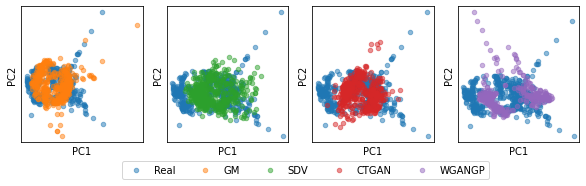

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 2.5))
axs_idxs = range(4)
idx = dict(zip(SYNTHESIZERS,axs_idxs))
targets = [0,1]
COLORS = [['tab:blue','tab:orange'], ['tab:blue','tab:green'], ['tab:blue','tab:red'], ['tab:blue','tab:purple']]
cont = 0
first = True 
legend_data = list()
isomap_real = isomap['Real'][['PC1','PC2']]
for name in SYNTHESIZERS :
    
    isomap_data = pd.DataFrame(data=isomap['Real'], columns=['PC1','PC2','Label']).append(isomap[name]).sample(frac=1)
    ax = axs[idx[name]]
    colors = COLORS[cont]
    
    for target, color in zip(targets,colors):
        indicesToKeep = isomap_data['Label'] == target
        handles = ax.scatter(isomap_data.loc[indicesToKeep, 'PC1'], isomap_data.loc[indicesToKeep, 'PC2'], c = color, s = 20, alpha = 0.5)
        
        if target == 1 or first == True :
            legend_data.append(handles)
            first = False
            
        isomap_synthetic = isomap[name][['PC1','PC2']]
        
    print(name)
    joint_dist = dra_distance(isomap_real, isomap_synthetic)
    print('- Joint distance: ', joint_dist)
             
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_xticks([])
    ax.set_yticks([])
    cont=cont+1

ax.legend(handles=legend_data, ncol=5, labels=DATA_TYPES, bbox_to_anchor=(0.3,-0.1))
fig.savefig('DATA REDUCTION RESULTS/ISOMAP_PLOTS.png', bbox_inches='tight')